## Linear Algebra Example 1:

# x + 3y + 5z = 10
# 2x + 5y + z = 8
# 2x + 3y + 8z = 3

In [1]:
#Import neccesary libraries
import numpy as np
import scipy as sc

In [2]:
#Define the coefficient matrix A

A = np.array([[1,3,5],[2,5,1],[2,3,8]])
print(A)

[[1 3 5]
 [2 5 1]
 [2 3 8]]


In [4]:
#Define the right-hand side vector b

B = np.array([[10],[8],[3]])
print(B)

[[10]
 [ 8]
 [ 3]]


In [5]:
#Calculate the inverse of A and multiply by b to find the solution vector
C = sc.linalg.inv(A).dot(B)
print(C)

[[-9.28]
 [ 5.16]
 [ 0.76]]


In [6]:
#Alternatively, use the solve function to find the solution vector directly
D = sc.linalg.solve(A,B)
print(D)

[[-9.28]
 [ 5.16]
 [ 0.76]]


## Linear Algebra Example 2

# 3x + 2y = 1
# x + 2y = 0

In [7]:
import numpy as np
from scipy.linalg import solve

#Coefficients Matrix
A = np.array([[3,2],[1,2]])

B = np.array([1,0])

#Using the solve function to find the solution to the system of equations
solution = solve(A,B)

solution

array([ 0.5 , -0.25])

# Solving ODE with Runga-Kutta Method

In [29]:
# Python program to implement Runga-Kutta method
# A sample differential equation"dy/dx = (x-y)/2"

def dydx(x, y):
    return((x-y)/2)

# Finds value of y for a given x using step size h 
# and initial value y0 at x0

def rungeKutta(x0, y0, x, h):
    #count number of iterations using step size or step height
    n = int((x-x0)/h)
    print('Number of iteration: ', n)
    
    #iterate for number of iterations
    y = y0
    for i in range(1, n + 1):
        print('i: ', i)
        # Apply Runge-Kutta formula to find the next k value
        k1 = dydx(x0, y)
        k2 = dydx(x0 + 0.5 * h, y + 0.5 * h * k1)
        k3 = dydx(x0 + 0.5 * h, y + 0.5 * h * k2)
        k4 = dydx(x0 + h, y + h * k3) 
        
        #Update next value of y
        y = y + (1/6) * h * (k1 + 2 * k2 + 2 * k3 + k4)
        
        #Update next value of x
        x0 = x0 + h
    return y


# Driver method
x0 = 0
y = 1
x = 5
h = 0.2

print('The value of y at x is: ', rungeKutta(x0, y, x, h))

Number of iteration:  25
i:  1
i:  2
i:  3
i:  4
i:  5
i:  6
i:  7
i:  8
i:  9
i:  10
i:  11
i:  12
i:  13
i:  14
i:  15
i:  16
i:  17
i:  18
i:  19
i:  20
i:  21
i:  22
i:  23
i:  24
i:  25
The value of y at x is:  3.2462555535430524


# Pressure Profile In a Vessel

In [26]:
#Importing necessary libraries
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

# parameter values for original SEIR
V = 1154 #m3
R = 8.314 #R[J/(mol*K)]
T = 120 #°C 

massin = 473220 #kg/h
MWin = 56.6 #kg/kmol
massout = 28742 #kg/h
MWout = 40.4 #kg/kmol

#calculation, time in minutes
Tk = T + 273.15 #convert T in Kelvin

molin = massin/MWin/60      #kmol/min
molout = massout/MWout/60   #kmol/min

#initial condition 
P0 = 1830 #kPa

#differential equation using ideal gas
def dPdt(P, t):
    #the differential equations
    dPdt = (molin - molout)/(V/(R*Tk))
    
    return dPdt

# create the x axis for the integration
# time to response is 20 minutes

start = 0 
end = 30
t = np.linspace(start, end , end)

Pinitial = np.linspace(P0, P0, end)

#integration of the differential equation
P = sc.integrate.odeint(dPdt, P0, t)

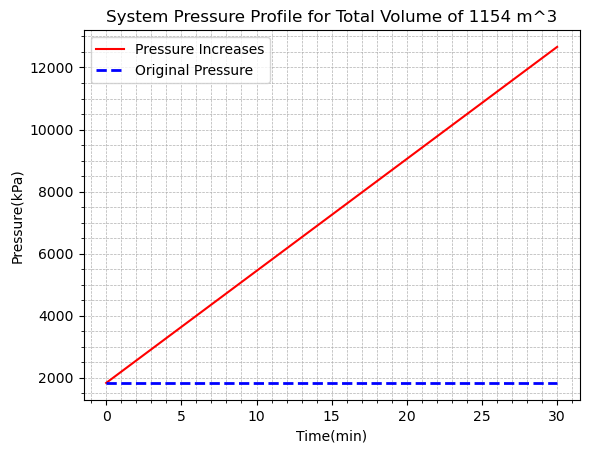

In [28]:
# Plotting the results
plt.figure()
plt.plot(t, P, 'r', label='Pressure Increases')
plt.plot(t, Pinitial, 'b--', label='Original Pressure', linewidth = 2)
plt.title(f'System Pressure Profile for Total Volume of {V} m^3')
plt.xlabel('Time(min)')
plt.ylabel('Pressure(kPa)')
plt.grid(True, which = 'both', linestyle = '--', linewidth = 0.5)
plt.minorticks_on()
plt.legend()
plt.show()

# Modeling a Zombie Apocalypse

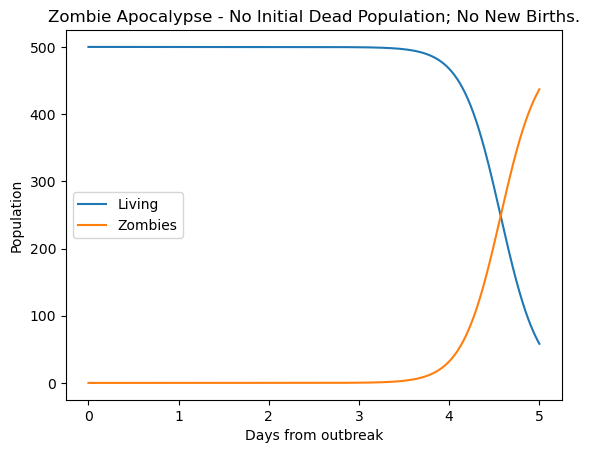

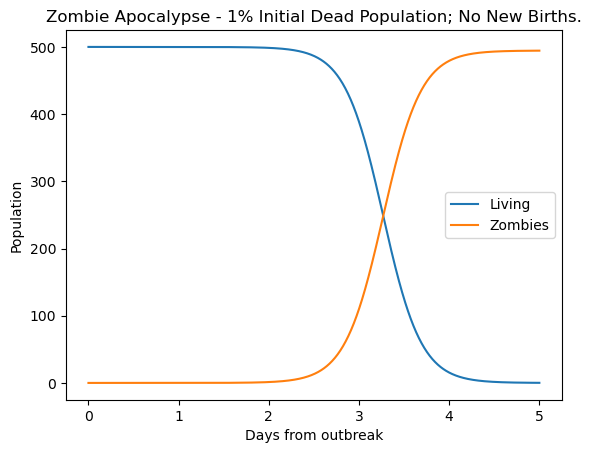

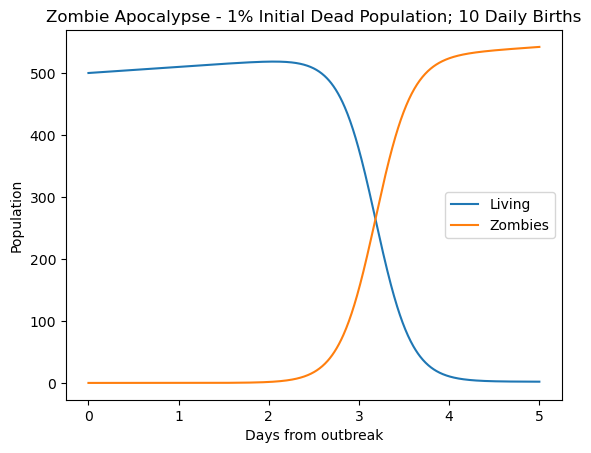

In [37]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Parameters for the model, representing various rates per day
P = 0  # Birth rate (new individuals per day)
d = 0.0001  # Natural death percent (probability of dying each day)
B = 0.0095  # Transmission percent (probability of a living becoming a zombie each day)
G = 0.0001  # Resurrect percent (probability of a dead becoming a zombie each day)
A = 0.0001  # Destroy percent (probability of a zombie being destroyed each day)


# The system of differential equations: y is the vector of populations, t is time
def f(y, t):
    Si = y[0]  # Susceptible (living) population
    Zi = y[1]  # Zombie population
    Ri = y[2]  # Removed (dead) population
    # Model equations for the rates of change of each population
    f0 = P - B * Si * Zi - d * Si  # Rate of change of living
    f1 = B * Si * Zi + G * Ri - A * Si * Zi  # Rate of change of zombies
    f2 = d * Si + A * Si * Zi - G * Ri  # Rate of change of dead
    return [f0, f1, f2]



# Initial conditions for the model
S0 = 500.0  # Initial population of living
Z0 = 0      # Initial zombie population
R0 = 0      # Initial dead population
y0 = [S0, Z0, R0]  # Vector of initial conditions
t = np.linspace(0, 5., 1000)  # Time grid for the simulation (0 to 5 days, 1000 points)


# Solving the differential equations over time t, starting from initial conditions y0
soln = odeint(f, y0, t)
S = soln[:, 0]  # Extracting the solution for living
Z = soln[:, 1]  # Extracting the solution for zombies
R = soln[:, 2]  # Extracting the solution for dead

# Plotting the results for the initial scenario
plt.figure()
plt.plot(t, S, label='Living')
plt.plot(t, Z, label='Zombies')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
plt.title('Zombie Apocalypse - No Initial Dead Population; No New Births.')
plt.legend(loc=0)
plt.show()


# Changing the initial conditions for a scenario with 1% initial dead population
R0 = 0.01 * S0  # 1% of the initial population is dead
y0 = [S0, Z0, R0]  # Updating the initial conditions
soln = odeint(f, y0, t)  # Solving the DEs again with new initial conditions
S = soln[:, 0]
Z = soln[:, 1]
R = soln[:, 2]

# Plotting the results for the second scenario
plt.figure()
plt.plot(t, S, label='Living')
plt.plot(t, Z, label='Zombies')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
plt.title('Zombie Apocalypse - 1% Initial Dead Population; No New Births.')
plt.legend(loc=0)
plt.show()


# Updating the parameters for the third scenario with daily births
P = 10  # 10 new births daily
y0 = [S0, Z0, R0]  # Initial conditions remain the same as the second scenario
soln = odeint(f, y0, t)  # Solving the DEs with the new birth rate
S = soln[:, 0]
Z = soln[:, 1]
R = soln[:, 2]

# Plotting the results for the third scenario
plt.figure()
plt.plot(t, S, label='Living')
plt.plot(t, Z, label='Zombies')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
plt.title('Zombie Apocalypse - 1% Initial Dead Population; 10 Daily Births')
plt.legend(loc=0)
plt.show()